In [1]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [2]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

In [3]:
print(len(filename))

1430


In [4]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [5]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [6]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

       filename label
220    E/E1.jpg     E
9     A/A18.jpg     A
412   H/H34.jpg     H
772   O/O11.jpg     O
1200  V/V50.jpg     V
...         ...   ...
1291  X/X33.jpg     X
713    M/M8.jpg     M
717   N/N11.jpg     N
1003  S/S21.jpg     S
390   H/H14.jpg     H

[1430 rows x 2 columns]


In [7]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [10]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [11]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_64_100/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(64, 64), batch_size=10, color_mode="grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(64, 64), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[64, 64, 1]))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                 monitor = 'val_accuracy', verbose = 1, 
                                 save_best_only = True, mode='max')
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 100, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_64_100/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results['accuracy'])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 

115/115 [==============================] - 885s 8s/step - loss: 2.8215 - accuracy: 0.1801 - val_loss: 20.4133 - val_accuracy: 0.0385
Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 2.7460 - accuracy: 0.1871
Epoch 7: val_accuracy improved from 0.07692 to 0.08042, saving model to /saved_models_64_100\model_1.h5
115/115 [==============================] - 887s 8s/step - loss: 2.7460 - accuracy: 0.1871 - val_loss: 8.7397 - val_accuracy: 0.0804
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 2.6984 - accuracy: 0.1923
Epoch 8: val_accuracy improved from 0.08042 to 0.12937, saving model to /saved_models_64_100\model_1.h5
115/115 [==============================] - 890s 8s/step - loss: 2.6984 - accuracy: 0.1923 - val_loss: 3.3269 - val_accuracy: 0.1294
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 2.6413 - accuracy: 0.2142
Epoch 9: val_accuracy did not improve from 0.12937
115/115 [==============================] - 887s 8s/st

Epoch 35/100
115/115 [==============================] - ETA: 0s - loss: 2.2370 - accuracy: 0.3033
Epoch 35: val_accuracy did not improve from 0.40559
115/115 [==============================] - 891s 8s/step - loss: 2.2370 - accuracy: 0.3033 - val_loss: 3.3326 - val_accuracy: 0.1538
Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.2780 - accuracy: 0.2876
Epoch 36: val_accuracy did not improve from 0.40559
115/115 [==============================] - 890s 8s/step - loss: 2.2780 - accuracy: 0.2876 - val_loss: 5419747328.0000 - val_accuracy: 0.0280
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.2550 - accuracy: 0.2998
Epoch 37: val_accuracy did not improve from 0.40559
115/115 [==============================] - 891s 8s/step - loss: 2.2550 - accuracy: 0.2998 - val_loss: 3.4018 - val_accuracy: 0.1119
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.2535 - accuracy: 0.2911
Epoch 38: val_accuracy did not improve from 0.4

Epoch 64/100
115/115 [==============================] - ETA: 0s - loss: 2.0928 - accuracy: 0.3217
Epoch 64: val_accuracy did not improve from 0.40559
115/115 [==============================] - 893s 8s/step - loss: 2.0928 - accuracy: 0.3217 - val_loss: 3.6323 - val_accuracy: 0.2028
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.1752 - accuracy: 0.3182
Epoch 65: val_accuracy did not improve from 0.40559
115/115 [==============================] - 893s 8s/step - loss: 2.1752 - accuracy: 0.3182 - val_loss: 2.2466 - val_accuracy: 0.3182
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.1068 - accuracy: 0.3112
Epoch 66: val_accuracy did not improve from 0.40559
115/115 [==============================] - 895s 8s/step - loss: 2.1068 - accuracy: 0.3112 - val_loss: 3.5903 - val_accuracy: 0.3566
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.0988 - accuracy: 0.3392
Epoch 67: val_accuracy did not improve from 0.40559
115/

Epoch 93/100
115/115 [==============================] - ETA: 0s - loss: 2.0699 - accuracy: 0.3374
Epoch 93: val_accuracy did not improve from 0.48252
115/115 [==============================] - 905s 8s/step - loss: 2.0699 - accuracy: 0.3374 - val_loss: 1319.5585 - val_accuracy: 0.2692
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.1031 - accuracy: 0.3400
Epoch 94: val_accuracy did not improve from 0.48252
115/115 [==============================] - 904s 8s/step - loss: 2.1031 - accuracy: 0.3400 - val_loss: 1.8418 - val_accuracy: 0.4196
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.1286 - accuracy: 0.3313
Epoch 95: val_accuracy did not improve from 0.48252
115/115 [==============================] - 904s 8s/step - loss: 2.1286 - accuracy: 0.3313 - val_loss: 3.3808 - val_accuracy: 0.1678
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.1200 - accuracy: 0.3427
Epoch 96: val_accuracy did not improve from 0.48252
1

                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                                 
 activation_31 (Activation)  (None, 26)                0         
                                                                 
Total params: 157,470,618
Trainable params: 157,469,978
Non-trainable params: 640
_________________________________________________________________
Epoch 1/100
115/115 [==============================] - ETA: 0s - loss: 4.0658 - accuracy: 0.0524
Epoch 1: val_accuracy improved from -inf to 0.03846, saving model to /saved_models_64_100\model

115/115 [==============================] - ETA: 0s - loss: 2.3885 - accuracy: 0.2684
Epoch 26: val_accuracy did not improve from 0.16434
115/115 [==============================] - 925s 8s/step - loss: 2.3885 - accuracy: 0.2684 - val_loss: 8.4110 - val_accuracy: 0.0559
Epoch 27/100
115/115 [==============================] - ETA: 0s - loss: 2.4151 - accuracy: 0.2649
Epoch 27: val_accuracy did not improve from 0.16434
115/115 [==============================] - 916s 8s/step - loss: 2.4151 - accuracy: 0.2649 - val_loss: 8.4850 - val_accuracy: 0.0944
Epoch 28/100
115/115 [==============================] - ETA: 0s - loss: 2.3508 - accuracy: 0.2806
Epoch 28: val_accuracy did not improve from 0.16434
115/115 [==============================] - 916s 8s/step - loss: 2.3508 - accuracy: 0.2806 - val_loss: 4.3543 - val_accuracy: 0.0874
Epoch 29/100
115/115 [==============================] - ETA: 0s - loss: 2.3281 - accuracy: 0.2640
Epoch 29: val_accuracy improved from 0.16434 to 0.18531, saving model

115/115 [==============================] - ETA: 0s - loss: 2.2442 - accuracy: 0.3024
Epoch 54: val_accuracy did not improve from 0.31818
115/115 [==============================] - 918s 8s/step - loss: 2.2442 - accuracy: 0.3024 - val_loss: 7.5016 - val_accuracy: 0.0979
Epoch 55/100
115/115 [==============================] - ETA: 0s - loss: 2.2786 - accuracy: 0.2753
Epoch 55: val_accuracy did not improve from 0.31818
115/115 [==============================] - 920s 8s/step - loss: 2.2786 - accuracy: 0.2753 - val_loss: 2.7600 - val_accuracy: 0.2203
Epoch 56/100
115/115 [==============================] - ETA: 0s - loss: 2.2233 - accuracy: 0.2946
Epoch 56: val_accuracy did not improve from 0.31818
115/115 [==============================] - 921s 8s/step - loss: 2.2233 - accuracy: 0.2946 - val_loss: 4.0222 - val_accuracy: 0.1329
Epoch 57/100
115/115 [==============================] - ETA: 0s - loss: 2.2827 - accuracy: 0.3024
Epoch 57: val_accuracy did not improve from 0.31818
115/115 [========

Epoch 83/100
115/115 [==============================] - ETA: 0s - loss: 2.1703 - accuracy: 0.3287 
Epoch 83: val_accuracy did not improve from 0.38112
115/115 [==============================] - 3401s 30s/step - loss: 2.1703 - accuracy: 0.3287 - val_loss: 5.6837 - val_accuracy: 0.1538
Epoch 84/100
115/115 [==============================] - ETA: 0s - loss: 2.2114 - accuracy: 0.3033
Epoch 84: val_accuracy did not improve from 0.38112
115/115 [==============================] - 912s 8s/step - loss: 2.2114 - accuracy: 0.3033 - val_loss: 5.7413 - val_accuracy: 0.0420
Epoch 85/100
115/115 [==============================] - ETA: 0s - loss: 2.1926 - accuracy: 0.3042
Epoch 85: val_accuracy did not improve from 0.38112
115/115 [==============================] - 920s 8s/step - loss: 2.1926 - accuracy: 0.3042 - val_loss: 2.8039 - val_accuracy: 0.2448
Epoch 86/100
115/115 [==============================] - ETA: 0s - loss: 2.1353 - accuracy: 0.3217
Epoch 86: val_accuracy did not improve from 0.38112
1

                                                                 
 activation_39 (Activation)  (None, 45, 45, 512)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 43, 43, 512)       2359808   
                                                                 
 activation_40 (Activation)  (None, 43, 43, 512)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 41, 41, 512)       2359808   
                                                                 
 activation_41 (Activation)  (None, 41, 41, 512)       0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 40, 40, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 38, 38, 512)       2359808   
          

Epoch 16/100
115/115 [==============================] - ETA: 0s - loss: 2.5814 - accuracy: 0.2316
Epoch 16: val_accuracy did not improve from 0.29371
115/115 [==============================] - 945s 8s/step - loss: 2.5814 - accuracy: 0.2316 - val_loss: 3.7174 - val_accuracy: 0.1399
Epoch 17/100
115/115 [==============================] - ETA: 0s - loss: 2.5109 - accuracy: 0.2281
Epoch 17: val_accuracy did not improve from 0.29371
115/115 [==============================] - 927s 8s/step - loss: 2.5109 - accuracy: 0.2281 - val_loss: 113154952.0000 - val_accuracy: 0.2448
Epoch 18/100
115/115 [==============================] - ETA: 0s - loss: 2.5374 - accuracy: 0.2448
Epoch 18: val_accuracy did not improve from 0.29371
115/115 [==============================] - 927s 8s/step - loss: 2.5374 - accuracy: 0.2448 - val_loss: 9.1793 - val_accuracy: 0.0455
Epoch 19/100
115/115 [==============================] - ETA: 0s - loss: 2.5522 - accuracy: 0.2264
Epoch 19: val_accuracy did not improve from 0.29

Epoch 45/100
115/115 [==============================] - ETA: 0s - loss: 2.4085 - accuracy: 0.2762
Epoch 45: val_accuracy did not improve from 0.41608
115/115 [==============================] - 917s 8s/step - loss: 2.4085 - accuracy: 0.2762 - val_loss: 2.0694 - val_accuracy: 0.4021
Epoch 46/100
115/115 [==============================] - ETA: 0s - loss: 2.3710 - accuracy: 0.2552
Epoch 46: val_accuracy did not improve from 0.41608
115/115 [==============================] - 914s 8s/step - loss: 2.3710 - accuracy: 0.2552 - val_loss: 2.4813 - val_accuracy: 0.2622
Epoch 47/100
115/115 [==============================] - ETA: 0s - loss: 2.3281 - accuracy: 0.2850
Epoch 47: val_accuracy did not improve from 0.41608
115/115 [==============================] - 914s 8s/step - loss: 2.3281 - accuracy: 0.2850 - val_loss: 4.0880 - val_accuracy: 0.1014
Epoch 48/100
115/115 [==============================] - ETA: 0s - loss: 2.3666 - accuracy: 0.2430
Epoch 48: val_accuracy did not improve from 0.41608
115/

Epoch 74/100
115/115 [==============================] - ETA: 0s - loss: 2.3251 - accuracy: 0.2684
Epoch 74: val_accuracy did not improve from 0.46154
115/115 [==============================] - 922s 8s/step - loss: 2.3251 - accuracy: 0.2684 - val_loss: 2.2785 - val_accuracy: 0.3322
Epoch 75/100
115/115 [==============================] - ETA: 0s - loss: 2.2951 - accuracy: 0.2771
Epoch 75: val_accuracy did not improve from 0.46154
115/115 [==============================] - 924s 8s/step - loss: 2.2951 - accuracy: 0.2771 - val_loss: 2.4594 - val_accuracy: 0.2378
Epoch 76/100
115/115 [==============================] - ETA: 0s - loss: 2.3184 - accuracy: 0.2692
Epoch 76: val_accuracy did not improve from 0.46154
115/115 [==============================] - 926s 8s/step - loss: 2.3184 - accuracy: 0.2692 - val_loss: 7.0075 - val_accuracy: 0.0559
Epoch 77/100
115/115 [==============================] - ETA: 0s - loss: 2.2500 - accuracy: 0.3042
Epoch 77: val_accuracy did not improve from 0.46154
115/

 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 activation_50 (Activation)  (None, 57, 57, 128)       0         
          

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 2.7383 - accuracy: 0.2002
Epoch 7: val_accuracy did not improve from 0.12937
115/115 [==============================] - 916s 8s/step - loss: 2.7383 - accuracy: 0.2002 - val_loss: 7.7107 - val_accuracy: 0.0734
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 2.7120 - accuracy: 0.1993
Epoch 8: val_accuracy did not improve from 0.12937
115/115 [==============================] - 919s 8s/step - loss: 2.7120 - accuracy: 0.1993 - val_loss: 5.3961 - val_accuracy: 0.1154
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 2.5771 - accuracy: 0.2037
Epoch 9: val_accuracy improved from 0.12937 to 0.15734, saving model to /saved_models_64_100\model_4.h5
115/115 [==============================] - 930s 8s/step - loss: 2.5771 - accuracy: 0.2037 - val_loss: 3.5202 - val_accuracy: 0.1573
Epoch 10/100
115/115 [==============================] - ETA: 0s - loss: 2.6126 - accuracy: 0.2089
Epoch 10:

115/115 [==============================] - 916s 8s/step - loss: 2.2458 - accuracy: 0.3024 - val_loss: 2.1203 - val_accuracy: 0.3322
Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.2313 - accuracy: 0.2937
Epoch 36: val_accuracy did not improve from 0.33566
115/115 [==============================] - 916s 8s/step - loss: 2.2313 - accuracy: 0.2937 - val_loss: 2.5357 - val_accuracy: 0.2867
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.2371 - accuracy: 0.3059
Epoch 37: val_accuracy did not improve from 0.33566
115/115 [==============================] - 915s 8s/step - loss: 2.2371 - accuracy: 0.3059 - val_loss: 2.3096 - val_accuracy: 0.2762
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.2365 - accuracy: 0.3129
Epoch 38: val_accuracy did not improve from 0.33566
115/115 [==============================] - 916s 8s/step - loss: 2.2365 - accuracy: 0.3129 - val_loss: 26.0683 - val_accuracy: 0.0280
Epoch 39/100
115/115 

115/115 [==============================] - ETA: 0s - loss: 2.1584 - accuracy: 0.3094
Epoch 64: val_accuracy did not improve from 0.46503
115/115 [==============================] - 920s 8s/step - loss: 2.1584 - accuracy: 0.3094 - val_loss: 39566270464.0000 - val_accuracy: 0.3776
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.1581 - accuracy: 0.3365
Epoch 65: val_accuracy did not improve from 0.46503
115/115 [==============================] - 919s 8s/step - loss: 2.1581 - accuracy: 0.3365 - val_loss: 1.9503 - val_accuracy: 0.3776
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.1496 - accuracy: 0.3374
Epoch 66: val_accuracy did not improve from 0.46503
115/115 [==============================] - 921s 8s/step - loss: 2.1496 - accuracy: 0.3374 - val_loss: 1.8053 - val_accuracy: 0.4126
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.1223 - accuracy: 0.3383
Epoch 67: val_accuracy did not improve from 0.46503
115/115

Epoch 93/100
115/115 [==============================] - ETA: 0s - loss: 2.0364 - accuracy: 0.3619
Epoch 93: val_accuracy did not improve from 0.47902
115/115 [==============================] - 926s 8s/step - loss: 2.0364 - accuracy: 0.3619 - val_loss: 2.0381 - val_accuracy: 0.3182
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 1.9604 - accuracy: 0.3802
Epoch 94: val_accuracy did not improve from 0.47902
115/115 [==============================] - 927s 8s/step - loss: 1.9604 - accuracy: 0.3802 - val_loss: 2.2089 - val_accuracy: 0.2622
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 1.9754 - accuracy: 0.3540
Epoch 95: val_accuracy did not improve from 0.47902
115/115 [==============================] - 926s 8s/step - loss: 1.9754 - accuracy: 0.3540 - val_loss: 5.9504 - val_accuracy: 0.0839
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.0060 - accuracy: 0.3540
Epoch 96: val_accuracy did not improve from 0.47902
115/

                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 26)                1690      
                                                                 
 activation_79 (Activation)  (None, 26)                0         
                                                                 
Total params: 157,470,618
Trainable params: 157,469,978
Non-trainable params: 640
_________________________________________________________________
Epoch 1/100
115/115 [==============================] - ETA: 0s - loss: 4.1076 - accuracy: 0.0577
Epoch 1: val_accuracy improved from -inf to 0.05944, saving model to /saved_models_64_100\model

115/115 [==============================] - ETA: 0s - loss: 2.3703 - accuracy: 0.2727
Epoch 26: val_accuracy did not improve from 0.24476
115/115 [==============================] - 921s 8s/step - loss: 2.3703 - accuracy: 0.2727 - val_loss: 4.8019 - val_accuracy: 0.0804
Epoch 27/100
115/115 [==============================] - ETA: 0s - loss: 2.3546 - accuracy: 0.2823
Epoch 27: val_accuracy did not improve from 0.24476
115/115 [==============================] - 921s 8s/step - loss: 2.3546 - accuracy: 0.2823 - val_loss: 2.6338 - val_accuracy: 0.2168
Epoch 28/100
115/115 [==============================] - ETA: 0s - loss: 2.3593 - accuracy: 0.2675
Epoch 28: val_accuracy did not improve from 0.24476
115/115 [==============================] - 921s 8s/step - loss: 2.3593 - accuracy: 0.2675 - val_loss: 3.5650 - val_accuracy: 0.0979
Epoch 29/100
115/115 [==============================] - ETA: 0s - loss: 2.3315 - accuracy: 0.2893
Epoch 29: val_accuracy did not improve from 0.24476
115/115 [========

Epoch 55/100
115/115 [==============================] - ETA: 0s - loss: 2.1789 - accuracy: 0.3260
Epoch 55: val_accuracy did not improve from 0.35315
115/115 [==============================] - 924s 8s/step - loss: 2.1789 - accuracy: 0.3260 - val_loss: 2.7019 - val_accuracy: 0.1958
Epoch 56/100
115/115 [==============================] - ETA: 0s - loss: 2.1687 - accuracy: 0.3400
Epoch 56: val_accuracy did not improve from 0.35315
115/115 [==============================] - 924s 8s/step - loss: 2.1687 - accuracy: 0.3400 - val_loss: 14.6146 - val_accuracy: 0.0490
Epoch 57/100
115/115 [==============================] - ETA: 0s - loss: 2.2058 - accuracy: 0.3129
Epoch 57: val_accuracy did not improve from 0.35315
115/115 [==============================] - 925s 8s/step - loss: 2.2058 - accuracy: 0.3129 - val_loss: 4.1889 - val_accuracy: 0.1119
Epoch 58/100
115/115 [==============================] - ETA: 0s - loss: 2.1885 - accuracy: 0.3121
Epoch 58: val_accuracy did not improve from 0.35315
115

Epoch 84/100
115/115 [==============================] - ETA: 0s - loss: 2.1450 - accuracy: 0.3260
Epoch 84: val_accuracy did not improve from 0.47203
115/115 [==============================] - 933s 8s/step - loss: 2.1450 - accuracy: 0.3260 - val_loss: 8.2602 - val_accuracy: 0.0524
Epoch 85/100
115/115 [==============================] - ETA: 0s - loss: 2.1801 - accuracy: 0.3164
Epoch 85: val_accuracy did not improve from 0.47203
115/115 [==============================] - 928s 8s/step - loss: 2.1801 - accuracy: 0.3164 - val_loss: 2.6247 - val_accuracy: 0.2448
Epoch 86/100
115/115 [==============================] - ETA: 0s - loss: 2.0238 - accuracy: 0.3601
Epoch 86: val_accuracy did not improve from 0.47203
115/115 [==============================] - 931s 8s/step - loss: 2.0238 - accuracy: 0.3601 - val_loss: 5.6840 - val_accuracy: 0.0524
Epoch 87/100
115/115 [==============================] - ETA: 0s - loss: 2.0983 - accuracy: 0.3304
Epoch 87: val_accuracy did not improve from 0.47203
115/

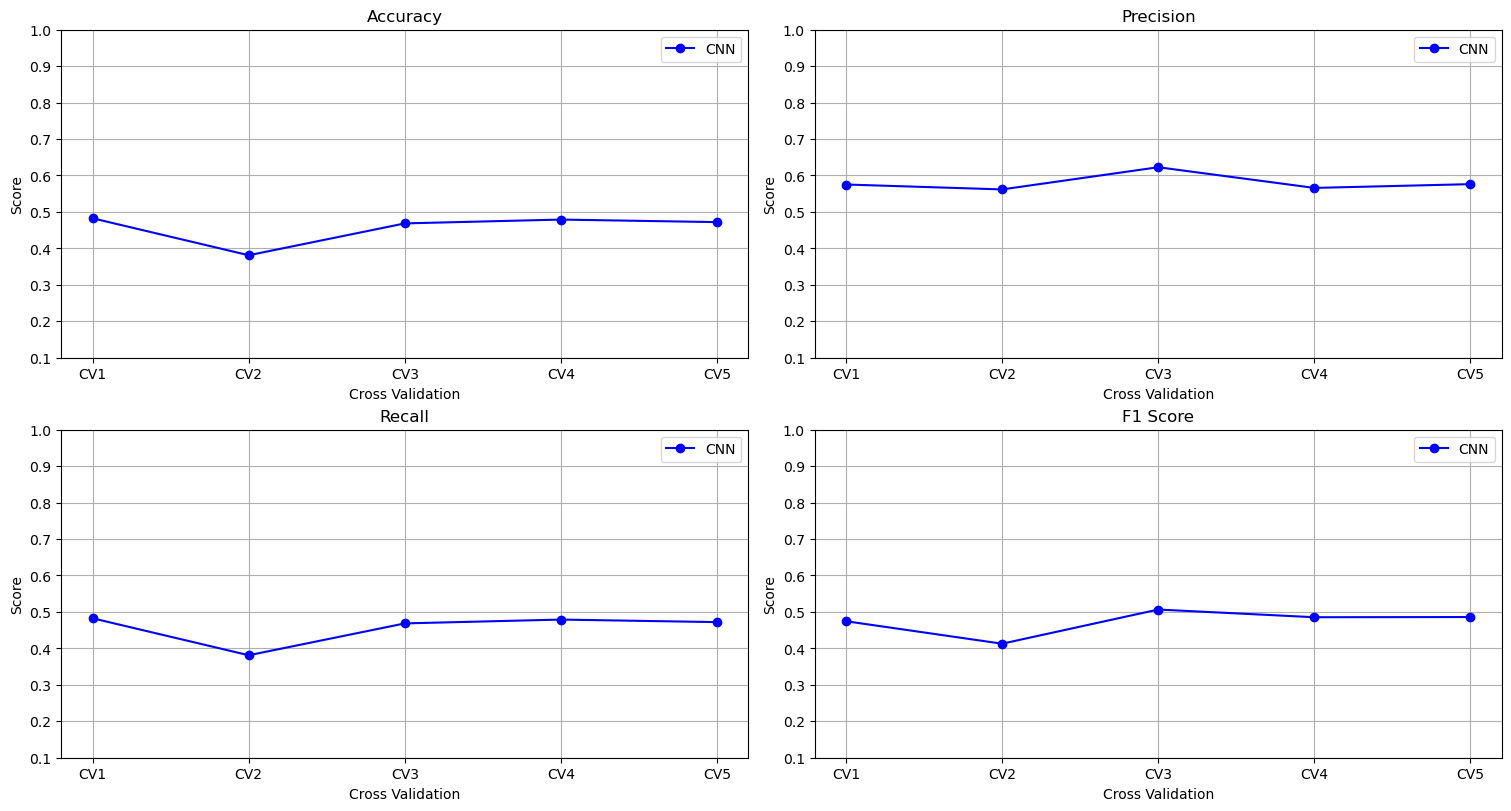

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

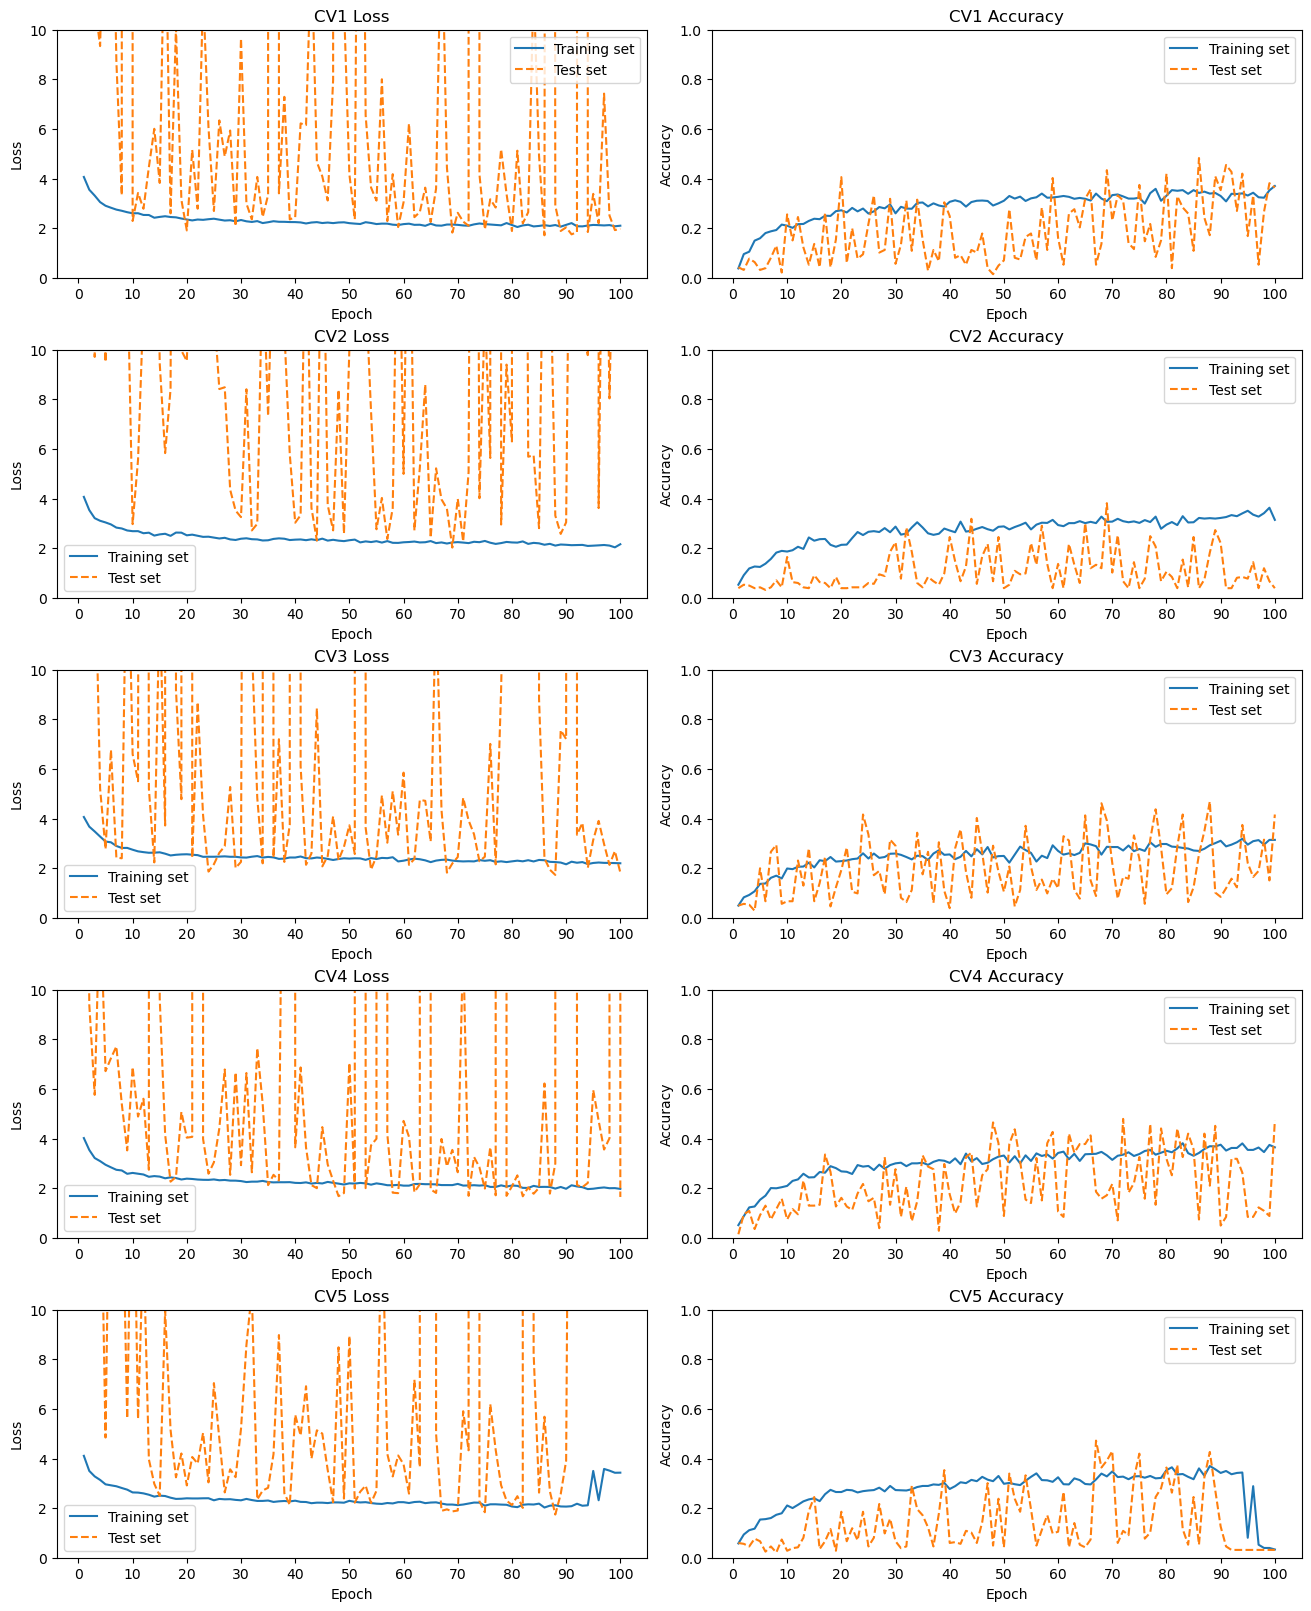

In [72]:
import matplotlib.pyplot as plt

n_epochs = 100
#set the x axis start from 1
x_axis = np.arange(1,101)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' Loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 10))
            ax[i,j].set_xticks(np.arange(0, 101, 10))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')    
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 101, 10))
            ax[i,j].legend()